In [3]:
import pandas as pd 
import re
import string
import nltk
import re

import torch
from transformers import BertTokenizer, BertModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.stats import pearsonr
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

df1=pd.read_csv('australia_pp.csv')
df2=pd.read_csv('nigeria_pp.csv')
df3=pd.read_csv('england_pp.csv')
df4=pd.read_csv('denmark_pp.csv')

df1=df1.drop(columns=['Unnamed: 0'],axis=1)
df2=df2.drop(columns=['Unnamed: 0'],axis=1)
df3=df3.drop(columns=['Unnamed: 0'],axis=1)
df4=df4.drop(columns=['Unnamed: 0'],axis=1)

df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)
df4.dropna(inplace=True)

def t_sim(i,j):

    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    # Example text columns
    # text1 = "The quick brown fox jumps over the lazy dog."
    # text2 = "The lazy dog is jumped over by a quick brown fox."

    # Tokenize input text and convert to tensors
    inputs1 = tokenizer(list(i['english_only_text'][:1500]), padding=True, truncation=True, return_tensors='pt')
    inputs2 = tokenizer(list(j['english_only_text'][:1500]), padding=True, truncation=True, return_tensors='pt')

    # Generate vector representations of input text using pre-trained BERT model
    with torch.no_grad():
        outputs1 = model(**inputs1)
        outputs2 = model(**inputs2)

    # Compute cosine similarity between vector representations
    similarity = torch.nn.functional.cosine_similarity(outputs1.last_hidden_state.mean(dim=1), outputs2.last_hidden_state.mean(dim=1), dim=1)
    return torch.mean(similarity).item()

n=[]
n.append(t_sim(df1,df2))
n.append(t_sim(df1,df3))
n.append(t_sim(df1,df4))

m=[]
m.append(t_sim(df2,df3))
m.append(t_sim(df2,df4))

p=t_sim(df3,df4)






Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\Users\Dheer\AppData\Local\Temp\ipykernel_2544\415648196.py:49: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. I

In [4]:
f_matrix=[[1,n[0],n[1],n[2]],[n[0],1,m[0],m[1]],[n[1],m[0],1,p],[n[2],m[1],p,1]]

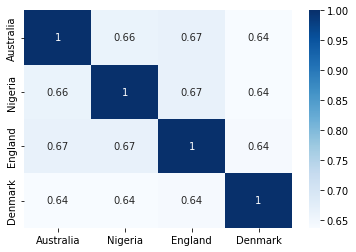

In [7]:
sns.heatmap(f_matrix,annot=True,cmap='Blues',xticklabels=['Australia','Nigeria','England','Denmark'],yticklabels=['Australia','Nigeria','England','Denmark'])
plt.savefig('nn_text_sim.png')